In [1]:
import sys

sys.path.append("../")
sys.path.append("../cascade")
sys.path.append("../data_analysis")

# print(sys.path)

from cascade.cascade_driver import CascadeDriver, CascadeEvent
from cascade.particle_event import CascadeParticle

init_particle = CascadeParticle(2212, 1e6, 0)
cas_event = CascadeEvent(emin_threshold = 1e3, particle = init_particle)


112.02363286951959
112.02363286951959
1e+100


ImportError: cannot import name 'DecayByPythia' from 'pythia_decay' (/hetghome/antonpr/xmax_sigma/examples/../cascade/pythia_decay.py)

In [2]:
cas_event.set_decay_on(True)
shower = CascadeDriver(cas_event)
shower.run(init_particle)

Pstack = 1, Fstack = 0, Iterations = 1
Pstack = 117, Fstack = 240, Iterations = 2
Pstack = 116, Fstack = 241, Iterations = 3
Pstack = 115, Fstack = 242, Iterations = 4
Pstack = 115, Fstack = 324, Iterations = 5
Pstack = 116, Fstack = 577, Iterations = 6
Pstack = 115, Fstack = 660, Iterations = 7
Pstack = 115, Fstack = 743, Iterations = 8
Pstack = 114, Fstack = 808, Iterations = 9
Pstack = 119, Fstack = 821, Iterations = 10
Pstack = 118, Fstack = 822, Iterations = 11
Pstack = 117, Fstack = 823, Iterations = 12
Pstack = 116, Fstack = 882, Iterations = 13
Pstack = 115, Fstack = 915, Iterations = 14
Pstack = 114, Fstack = 1016, Iterations = 15
Pstack = 114, Fstack = 1069, Iterations = 16
Pstack = 115, Fstack = 1243, Iterations = 17
Pstack = 115, Fstack = 1270, Iterations = 18
Pstack = 114, Fstack = 1349, Iterations = 19
Pstack = 113, Fstack = 1479, Iterations = 20
Pstack = 112, Fstack = 1480, Iterations = 21
Pstack = 113, Fstack = 1480, Iterations = 22
Pstack = 112, Fstack = 1745, Iteratio

Traceback (most recent call last):
  File "/hetghome/antonpr/miniconda3/envs/env_impy/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_3883892/3489713745.py", line 3, in <module>
    shower.run(init_particle)
  File "/hetghome/antonpr/xmax_sigma/examples/../cascade/cascade_driver.py", line 23, in run
    current_generation = self.cascade_event.get_event_particles(cur_particle)
  File "/hetghome/antonpr/xmax_sigma/examples/../cascade/cascade_event.py", line 111, in get_event_particles
    final_particles = self.decay_particles(final_particles)
  File "/hetghome/antonpr/xmax_sigma/examples/../cascade/cascade_event.py", line 85, in decay_particles
    dprod = self.pythia_dec.get_decayed_products(p.pid, p.energy)
  File "/hetghome/antonpr/xmax_sigma/examples/../cascade/pythia_decay.py", line 140, in get_decayed_products
  File "/hetghome/antonpr/xmax_sigma/examples/../cascade/p

In [3]:
from data_analysis import CascadeAnalysis
import importlib
import data_analysis
importlib.reload(data_analysis)

ca = CascadeAnalysis(shower)

ca.print_stats()

112.02363286951959
112.02363286951959
1e+100
Number of final particles = 13496
Number of events = 460:
 interactions = 208, decays = 135


{22: 3067, -14: 2335, 14: 2333, 11: 1392, -12: 1373, -11: 1262, 12: 1243, 2212: 389, -2212: 91, -13: 6, 13: 3, -211: 1, 211: 1}


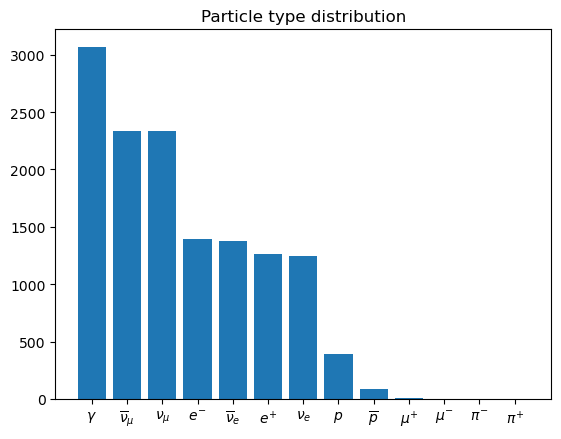

In [4]:
ca.plot_pid(to_ = 20)

Min = 0.00 km, Max = 41.90 km


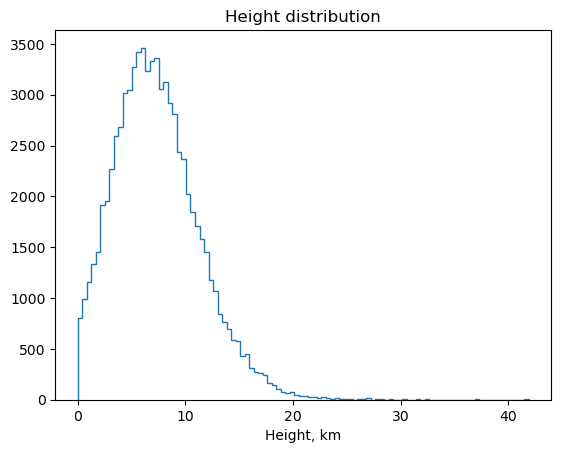

In [57]:
ca.plot_height(2212)

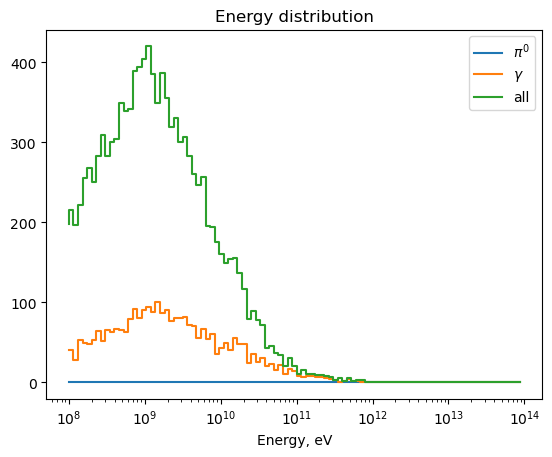

In [7]:
ca.plot_energy_list(pids = [111, 22],
                    all_pids = True, xrange = (1e8, 1e14), nbins = 100)

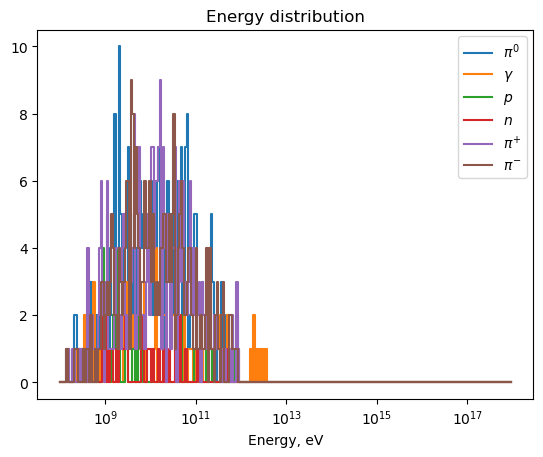

In [5]:
ca.plot_energy_list(pids = [111,22,2212, 2112, 211, -211],
                    all_pids = False, xrange = (1e8, 1e18), nbins = 300)

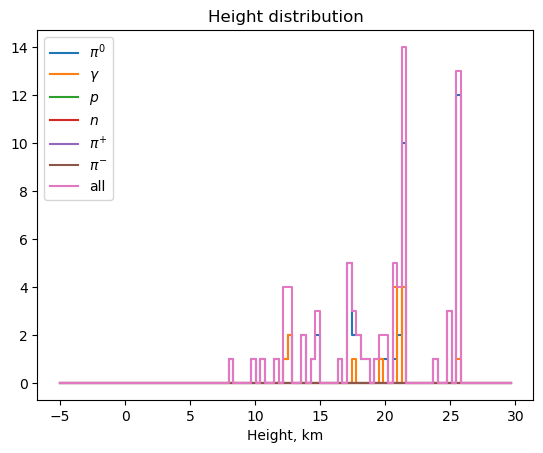

In [150]:
ca.plot_height_list(pids = [111,22,2212, 2112, 211, -211],
                    all_pids = True, xrange = (-5, 30),
                    energy_range = (1e15, 1e17),
                    nbins = 100)

In [ ]:
# import importlib
# import cascade.particle_event
# importlib.reload(cascade.particle_event)
# from cascade.particle_event import CascadeParticle


pt = shower.get_particles()



for p in pt:
    if p.generation_number > 5:
        print(p.get_parents())
        break